# Kalorimetrie Laborversuch

Author: XXXXX

Datum: XXXXX

Gruppe: XXXXX

## Forschungsfrage

Wärmekapazität verschiederner Materialien


## Versuchsaufbau und Durchführung

Dieser Versuch besteht aus zwei Teilen. Im ersten Teil wird die Kalorimetriekonstante von Wasser bestimmt. Dazu wird eine Heitzspule in 400g Wasser mit Sensoren und Rührer gegeben. Die Temperatur, so wie die Spannung und Stromstärke wird über drei Minuten gemessen.
Der zweite Versuchsaufbau besteht aus zwei Behältern, drei Proben und einem Pi mit Temperatursensoren. Im ersten Behälter wird Wasser auf 80 °C erwärmt und die Proben hineingegeben. Wenn die Proben die 80 °C erreicht haben, kann die Messung durchgeführt werden. Dazu wird im zweiten Behälter 200ml zimmerwarmes Wasser gefüllt, der Rührer eingeschalltet und Sensoren eingelassen. Die Probe wird nun in den zweiten Behälter getaucht und Messungen durchgeführt, bis sich die Temperatur nicht mehr ändert. Dieser Vorgang muss für alle Proben wiederholt werden.

<img src="figures/kalorimetrie_pruefstand.jpg" width="800">


## Versuchsauswertung

In [58]:
import numpy as np
from matplotlib import pyplot as plt
import h5py as h5
import importlib

from functions import m_json
from functions import utility

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Kalorimeterkonstante
Hinweis: Sie können die Funktion *get_json_entry* nutzen um auf Metadaten zuzugreifen. 

Für die Messdatenauswertung steht Ihnen bereits ein Modul utility.py zur Verfügung. Ergänzen sie die Funktionen im Modul zwischen TODO und DONE. Sie finden weitere Hinweise im jeweiligen Bereich TODO->DONE. 


#### (i) Messdaten einlesen
Lesen Sie die Messdaten in ihr Notebook ein.

In [59]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_const = "data/kalorimeter konstante/kalorimeter konstante.h5"


In [60]:
#Temperatur-Daten und Zeitpunkte auslesen (aus der hdf5-datei)
importlib.reload(utility)

data_dict = utility.get_plot_data_from_dataset(datafile_path_const, "RawData")

In [61]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.
# List the index of all calorimeter sensors (index_calorimeter) and
# the environment sensor (index_environment).
# You can use this variables to easily get access to the correct measurement data later.

index_environment = [3]  #stelle, an der sich der Environment-Sensor im data_dict befindent
index_calorimeter = [0,1,2]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

Die Mittelwerte und Standardabweichungen der Messungen werden in der nächsten Sektion geplottet.

Nachdem die Mittelwerte und Standardabweichungen berechnet wurden, können Daten jeder Wärmequelle jeweils in einem numpy.ndarray gespeichert werden.

#### (iii) Daten ploten

Im Kalorimeter befinden sich mehrere Sensoren, deren Mittelwerte sowie Standardabweichungen der Messung an jeden Zeitpunkt bestimmt wurden. Die Messdaten bzw. ihre Mittelwerte sollen in einem Plot eingetragen werden. Die Standardabweichungen der Sensoren sind als Errorbar im Plot zu sehen.

In [62]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of the calorimeter sensors and the environment sensor.
# You can use the indices from above.
mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_environment])

# DONE #

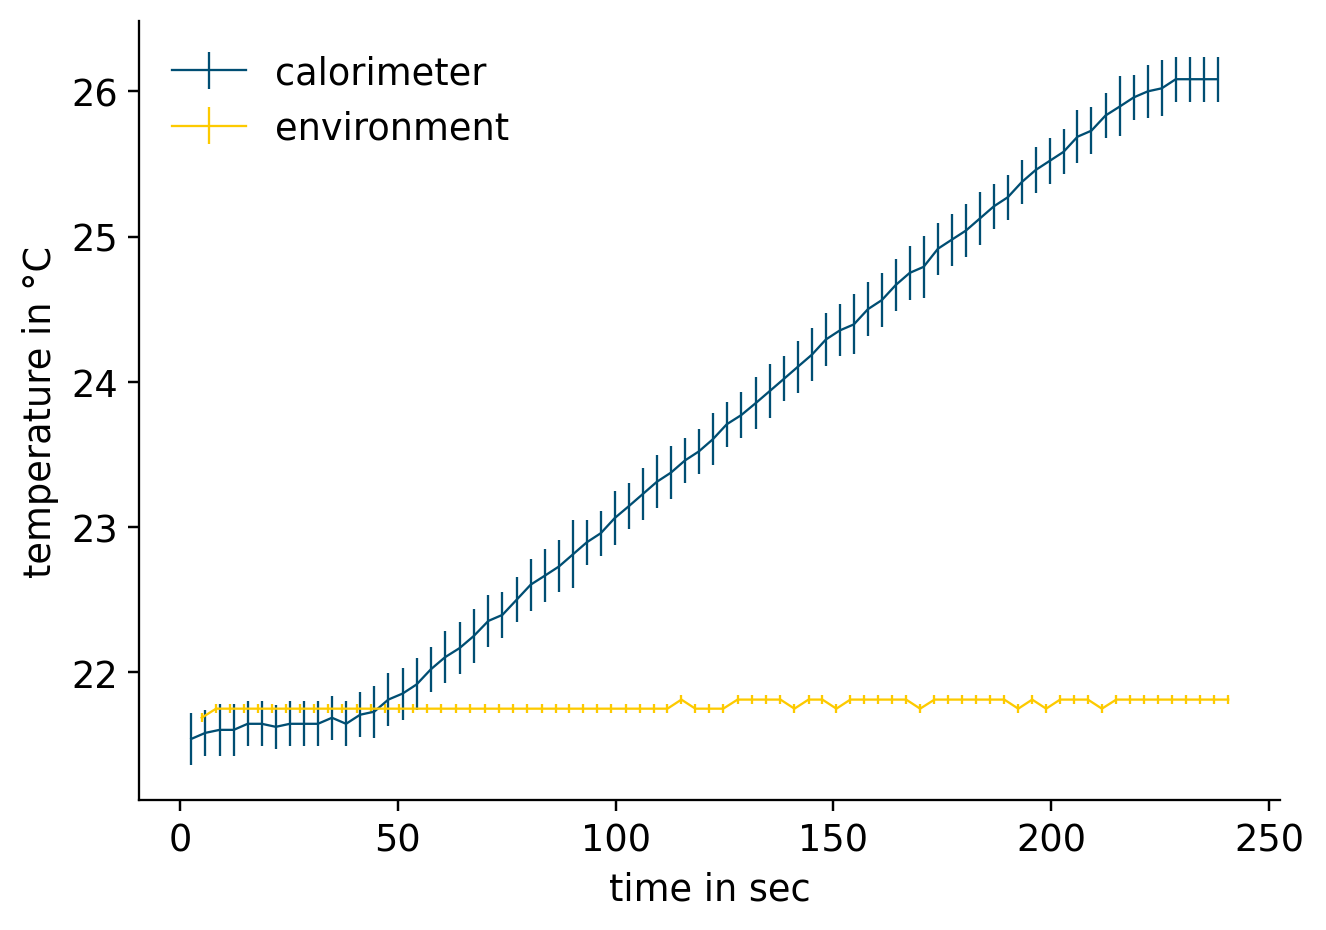

In [63]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting
utility.plot_temp_over_time([mean_std_calorimeter, mean_std_environment],[data_dict["timestamp"][[index_calorimeter[0]]],data_dict["timestamp"][index_environment]],["calorimeter","environment"],"time in sec","temperature in °C")

# DONE #

#### (iv) Metadaten auslesen

Die notwendigen Daten bzw. Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [64]:
# Heat capacity of Water has been given
water_heat_capa = 4.18

# TODO: Read mass of the water from the metadata of the experiment.

metadata = m_json.get_metadata_from_setup("data/kalorimeter konstante/setup_constant.json")

water_mass = m_json.get_json_entry("data/kalorimeter konstante", metadata["calorimeter"]["values"][0],
                                   ["calorimeter","medium","mass","value"])*0.001
water_mass

# DONE #

0.4

In [65]:
# TODO: Reading heater related data from hdf5 file, please use the same datafile_path_const variable for the HDF5 path.
# Hint: Note whether the data is stored as an array or a scalar in the hdf5 dataset.

h5path_heater = "RawData/" + metadata["actor"]["values"][0] #path im hdf5-file zum heater


with h5.File(datafile_path_const) as data:
    
    data2 = data[h5path_heater]
    
    current = data[h5path_heater]["Current"][()]
    heat_time = data[(h5path_heater + "/Heat time")][()]
    voltage = data[(h5path_heater + "/Voltage")][()]
# DONE #

#### (v) Anfangs- und Endwert der Temperatur
Die Anfangs- und Endwert der Temperatur im Kloriemeter sind notwendig, um die Wärmekapazität zu bestimmen. 

Eine Möglichkeit wäre, durch das Maxium bzw. Minium und einen Schwellenwert ist ein Teil der Daten zu entnehmen. 

Daraus sind Mittelwerte zu berechnen. Die entsprechenden Mittelwerte können als Anfangs- und Endtemperatur verwendet werden.

In [66]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_end, temperature_start = utility.get_start_end_temperature(mean_std_calorimeter[0]) 
# DONE #

#### (vi) Kalorimeterkonstante bestimmen
$$
C = \frac{UI\Delta t}{(T_2 - T_1)}
$$

In [67]:
# TODO: Calculate heat capacity of the calorimeter
calorimeter_const = (voltage * current * heat_time)/(temperature_end-temperature_start)

# DONE #

#### (Vii) Ergebnis

In [68]:
calorimeter_const

2357.3885879235963

### spezifische Wärmekapazität: erste Probe


#### (i) Messdaten einlesen

In [69]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob1 = "data/pdc014/pdc014.h5"

# DONE #

In [70]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob1,"RawData")

# DONE #

In [71]:


# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [72]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_bath])
# DONE #

#### (iii) Daten ploten

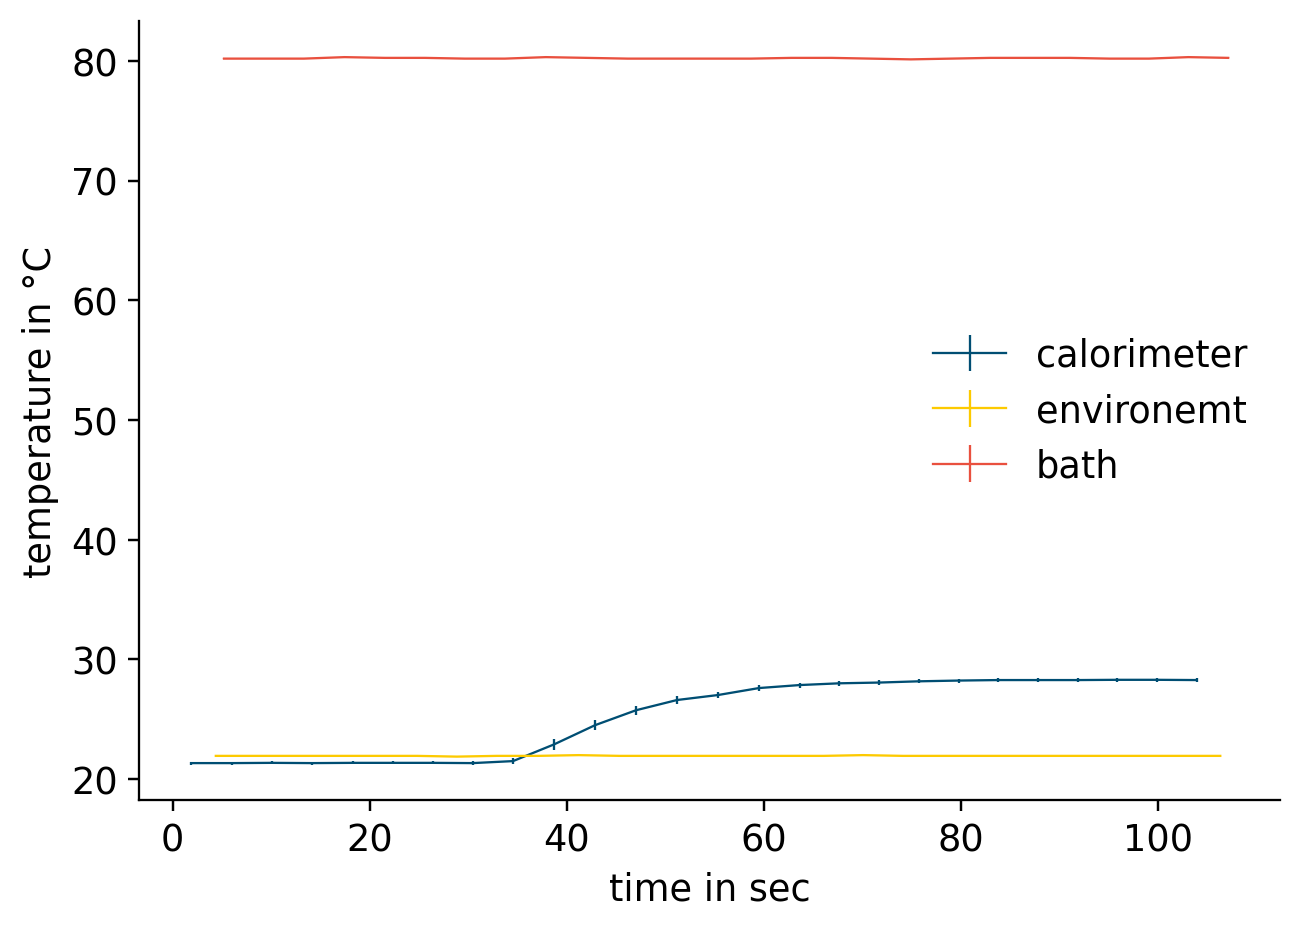

In [73]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time([mean_std_calorimeter,mean_std_environment,mean_std_heater],[data_dict["timestamp"][[0]],data_dict["timestamp"][index_env],data_dict["timestamp"][index_bath]],["calorimeter","environemt","bath"],"time in sec","temperature in °C")

# DONE #

#### (iv) Metadaten auslesen

In [74]:
# TODO: Read mass of the sample from the metadata of the experiment.

metadata = m_json.get_metadata_from_setup("data/pdc014/setup_PDC014.json")

sample_mass = m_json.get_json_entry("data/pdc014", metadata["probe"]["values"][0],
                                   ["probe","mass","value"])*0.001


# DONE #

#### (v) Anfangs- und Endwert der Temperatur
Die Mischungstemperatur und Anfangstemperatur des Kalorimeters sind für die Berechnung relevant.

In [75]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(mean_std_calorimeter[0]) 
# DONE #

In [76]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 temperature-values after the start of the measurement.

temperature_start_sample = np.mean(mean_std_heater[0][:10])
# DONE #

#### (vi) spezifische Wärmekapazität bestimmen
$$
c_p = \frac{C(T_M-T_1)}{m_p(T_2-T_M)}
$$

In [77]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = calorimeter_const*(temperature_mix-temperature_start_water)/(sample_mass*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [78]:
sample_heat_capa

438.35155713894454

### spezifische Wärmekapazität: zweite Probe


#### (i) Messdaten einlesen

In [79]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob2 = "data/pdc016/pdc016.h5"

# DONE #

In [80]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob2,"RawData")

# DONE #

In [81]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [82]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_bath])

# DONE #

#### (iii) Daten ploten

In [83]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time([mean_std_calorimeter,mean_std_environment,mean_std_heater],[data_dict["timestamp"][[0]],data_dict["timestamp"][index_env],data_dict["timestamp"][index_bath]],["calorimeter","environemt","bath"],"time in sec","temperature in °C")

# DONE #

#### (iv) Metadaten auslesen

In [84]:
# TODO: Read mass of the sample from the metadata of the experiment.

metadata = m_json.get_metadata_from_setup("data/pdc016/setup_PDC016.json")

sample_mass = m_json.get_json_entry("data/pdc016", metadata["probe"]["values"][0],
                                   ["probe","mass","value"])*0.001


# DONE #

#### (v) Anfangs- und Endwert der Temperatur

In [85]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(mean_std_calorimeter[0]) 
# DONE #

In [86]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(mean_std_heater[0][:10])

# DONE #

#### (vi) spezifische Wärmekapazität bestimmen

In [87]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = calorimeter_const*(temperature_mix-temperature_start_water)/(sample_mass*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [88]:
sample_heat_capa

558.2008262092726

### spezifische Wärmekapazität: dritte Probe


#### (i) Messdaten einlesen

In [89]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob3 = "data/pdc025/pdc025.h5"

# DONE #

In [90]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob3,"RawData")

# DONE #

In [91]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [92]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_bath])
# DONE #

#### (iii) Daten ploten

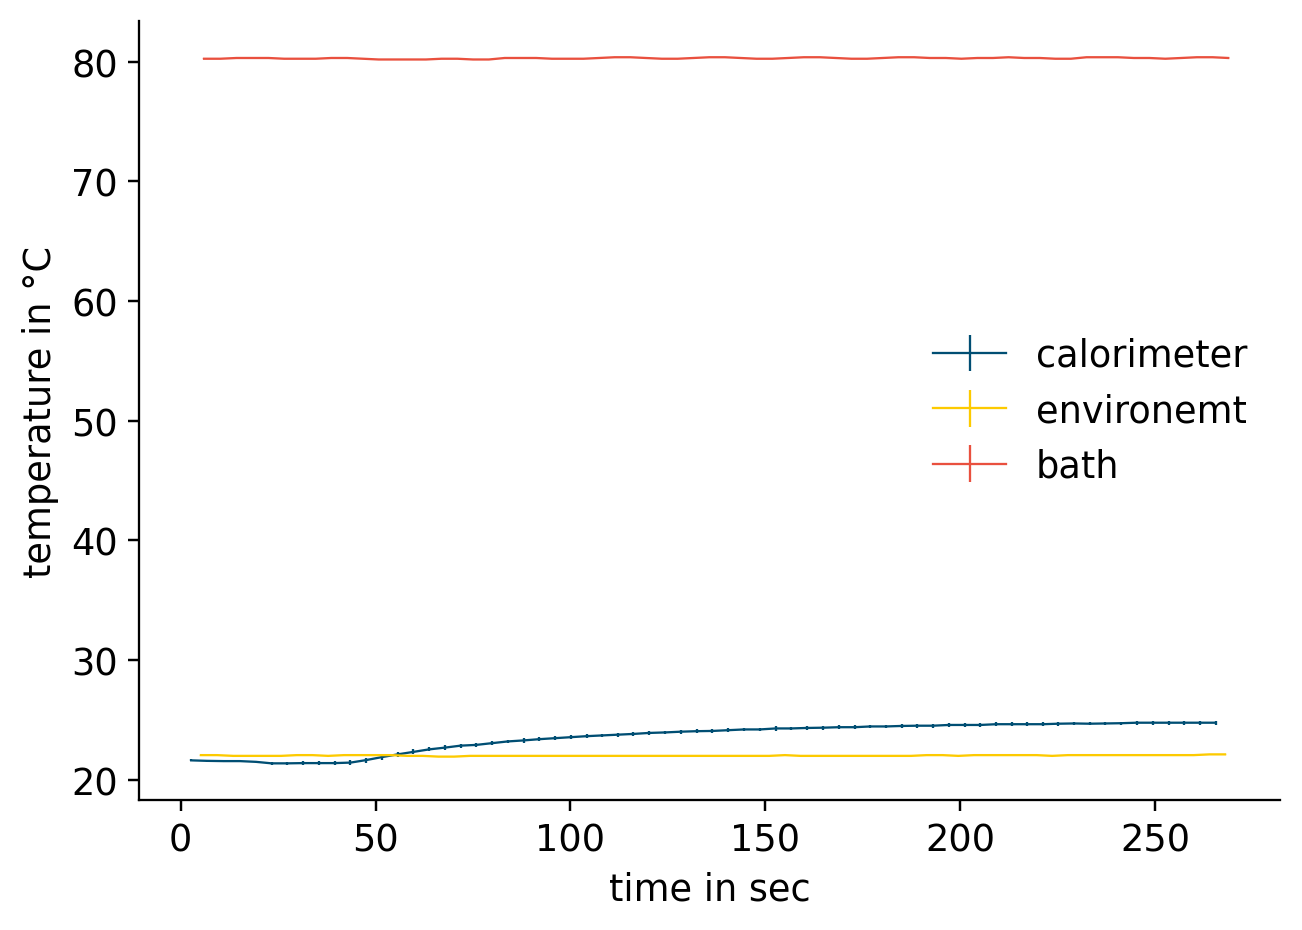

In [93]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time([mean_std_calorimeter,mean_std_environment,mean_std_heater],[data_dict["timestamp"][[0]],data_dict["timestamp"][index_env],data_dict["timestamp"][index_bath]],["calorimeter","environemt","bath"],"time in sec","temperature in °C")


# DONE #

#### (iv) Metadaten auslesen

In [94]:
# TODO: Read mass of the sample from the metadata of the experiment.

metadata = m_json.get_metadata_from_setup("data/pdc025/setup_PDC025.json")

sample_mass = m_json.get_json_entry("data/pdc025", metadata["probe"]["values"][0],
                                   ["probe","mass","value"])*0.001


# DONE #

#### (v) Anfangs- und Endwert der Temperatur

In [95]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(mean_std_calorimeter[0]) 

# DONE #

In [96]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(mean_std_heater[0][:10])

# DONE #

#### (vi) spezifische Wärmekapazität bestimmen

In [97]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = calorimeter_const*(temperature_mix-temperature_start_water)/(sample_mass*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [98]:
sample_heat_capa

1336.4848680663763

## Diskussion
Im oben ausgewerteten Versuch wurden folgende Wärmekapazitäten bestimmt:

Messing: $438.35 \frac{J}{kg*K}$ 

Aluminium$558.20 \frac{J}{kg*K}$

ABS: $1336.48 \frac{J}{kg*K}$

Im Verglich, mit im Internet gefunden Werten, weichen die experimentell bestimmten Werte stark ab. So wurde die Wärmekapazität für Messing zu hoch und für Aluminium und ABS zu niedrig bestimmt. Diese Messfehler können verschiedene Ursachen haben. Im Beispeil für Aluminium wurde am Anfang der Messung bei deiner der Sensoren im Wasser fälschlicher weise 28°C gemessen, was die Starttemperatur stark verfälscht. Werden die ersten Messungen verworfen, ergibt sich eine Wärmekapazität von $923.36 \frac{J}{kg*K}$, welche dichter am Tabellenwert liegt. Andere Fehlerquellen sind eine fehlende Isolierung des Mischbeählters, wo bei längerer Messung erhebliche Mengen an Wärme abgegeben werden. Außerdem entstehen durch Rechenungenauigkeiten, zum Beispiel Auswahl der Starttemperatur, Fehler. Dadruch, dass der zweite Versuch auf dem ersten aufbaut, potenziert sich der Rechenfehler aus dem ersten Versuche im Zweiten. Eine weiter Ungenauigkeit, ist die Schwankung in den Messungen, was das Festlegen auf eine Start/End-Temperatur ungenauer macht.

## Fazit
In diesem Versuch konnten in einem relativ kleinem Versuchsaufbau die Wärmekapazitäten von Proben bestimmt werden. Diese Werte entsprechen nicht den Tabellenwerten, sind sommit nur als Richtwerte zu betrachten.